In [2]:
import os
import pandas as pd
import numpy as np
from time import time

#from helper import parse_fix_matrix, view_alignment
from Bio import AlignIO, SeqIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA


from multiprocessing import Pool

#import pymol2

import pickle
from Bio.PDB import PDBParser, Superimposer, StructureAlignment
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import HDBSCAN

#from numba import jit

In [21]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Global structure alignment

In [231]:
# Load Global structure_alignment_df

with open("results/global_structure_alignment_plddt70_23_08_12.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)

# Small_cap_domain



with open("seq_dist_Global_23_08_03.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)


    


/home/sandra/anaconda3/envs/CbTan/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


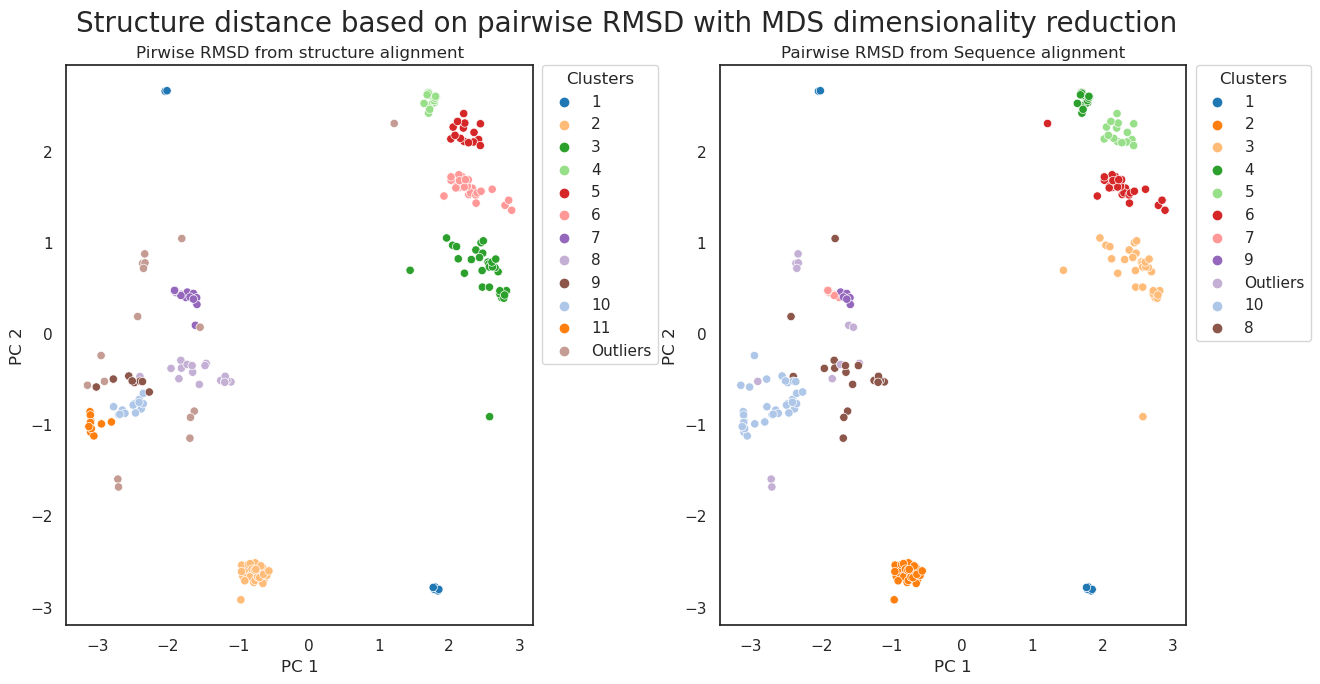

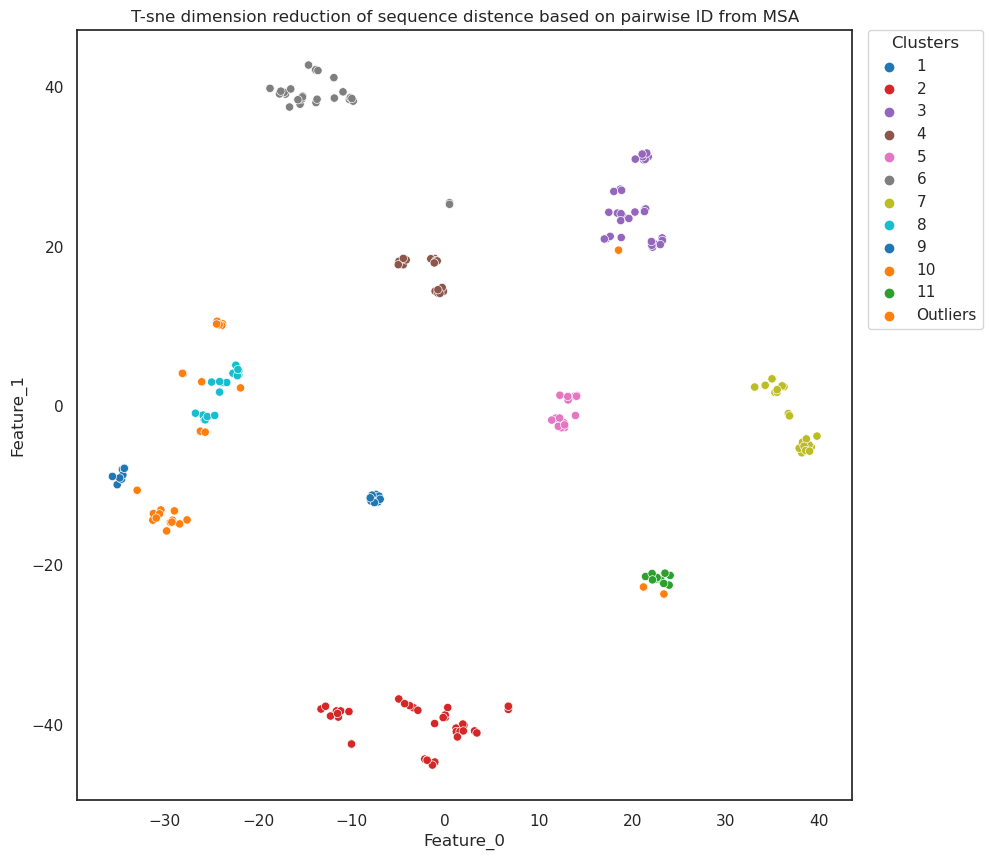

In [232]:
#kmeans_seq = KMeans(n_clusters=4, random_state=0).fit(seq_dict["vec"])
def convert(vec):
    return vec.astype(float)

#kmeans_seq = DBSCAN(eps=0.5, min_samples=5, metric = "precomputed").fit(list(map(convert, seq_dict["vec"])))
kmeans_seq = HDBSCAN(min_cluster_size = 8, min_samples=3, metric = "precomputed").fit(list(map(convert, seq_dict["vec"])))


dict_labels_30 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}
dict_labels_50 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}
dict_labels_70 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10", 10:"11"}
dict_labels_90 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}

dict_key_structure_sequence_30 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"4", "4":"2", "5":"6", "6":"3", "7":"9", "8":"8", "9":"7", "10":"10"}
dict_key_structure_sequence_50 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"4", "4":"2", "5":"6", "6":"3", "7":"9", "8":"8", "9":"7", "10":"10"} # Constructed from structure cluster mapping


dict_key_structure_sequence_70 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"3", "4":"2", "5":"6", "6":"4", "7":"7", "8":"9", "9":"8", "10":"10", "11":"11"}



dict_key_structure_sequence_90 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"4", "4":"2", "5":"6", "6":"3", "7":"9", "8":"8", "9":"7", "10":"10"}

order_30 = [0,2,3,4,5,6,1]
order_50 = [0,2,3,4,5,6,7,8,9,1,10]
order_70 = [0,3,4,5,6,7,8,9,10,1,2,11] #[0,2,3,4,5,6,7,8,9,1,10,2]
order_90 = [0,2,3,4,5,6,7,8,9,1,10]

order = order_70

#l = [dict_key_structure_sequence_30[dict_labels_30[i]] for i in kmeans_seq.labels_]
#l = [dict_key_structure_sequence_50[dict_labels_50[i]] for i in kmeans_seq.labels_]
l = [dict_key_structure_sequence_70[dict_labels_70[i]] for i in kmeans_seq.labels_]
#l = [dict_key_structure_sequence_90[dict_labels_90[i]] for i in kmeans_seq.labels_]


seq_id_label_map = {_id.split("_")[0]:label for _id, label in zip(seq_dict["id"],l)}



size = len(dict_structure_dist.keys()) #256

arr = np.zeros((size,size))
arr_1 = np.zeros((size,))
struct_dict={"id":[], "dist":[]}

n_clusters=3

for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((size,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]
    struct_dict["id"].append(rec_outer[0])
    struct_dict["dist"].append(arr_1)
#kmeans = AgglomerativeClustering(n_clusters=None, affinity="precomputed", linkage = 'complete', distance_threshold=15).fit(arr)
#kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(arr)
#kmeans = DBSCAN(eps=1, min_samples=5, metric = "precomputed").fit(arr)
kmeans = HDBSCAN(min_cluster_size = 8, min_samples=3, metric = "precomputed").fit(arr)
#dict_labels = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}

struct_cluster_label = [dict_labels_70[i] for i in kmeans.labels_]

#struct_cluster_label = kmeans.labels_

pca = MDS(n_components=2, metric= True, dissimilarity = "precomputed", n_init = 4, max_iter=300, eps = 1e-3)

X_embedded_pca = pca.fit_transform(arr)


arr_label_maped_seq_struct = []
for rec in struct_dict["id"]:
    #try:
    arr_label_maped_seq_struct.append(seq_id_label_map[rec.split(".")[0].split("_")[0]])
   # except:
    #    arr_label_maped_seq_struct.append(9)
        #print(rec)
#arr_label_maped_seq_struct = [ seq_id_label_map[_id.split("_")[0]] for _id in struct_dict["id"]]
struct_dict["seq_cluster_label"] = arr_label_maped_seq_struct
struct_dict["struct_cluster_label"] = struct_cluster_label
struct_dict = pd.DataFrame(struct_dict)

def pc_split(vec):
    #pcs = pca.transform([vec])
    return vec[0], vec[1]

struct_dict[f"PC 1"], struct_dict[f"PC 2"] = zip(*X_embedded_pca)#.map(pc_split))


f, ax = plt.subplots(1,2,figsize=[14,7])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict.sort_values(by="struct_cluster_label"), x=f"PC 1", y=f"PC 2", #hue="origin", size="weight",
            alpha=1, palette="tab20", ax=ax[0], hue="struct_cluster_label")
ax[0].set_title("Pirwise RMSD from structure alignment")

handles, labels = ax[0].get_legend_handles_labels()


ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



sns.scatterplot(data=struct_dict.sort_values(by="struct_cluster_label"), x=f"PC 1", y=f"PC 2", #hue="origin", size="weight",
            alpha=1, palette="tab20", ax=ax[1], hue="seq_cluster_label")
ax[1].set_title("Pairwise RMSD from Sequence alignment")
#ax[1].set_title("Structure distence based on pairwise RMSD from CE structure alignment")
f.suptitle("Structure distance based on pairwise RMSD with MDS dimensionality reduction")

handles, labels = ax[1].get_legend_handles_labels()
#print(labels)

order = order_50
ax[1].legend([handles[idx] for idx in order[:11]],[labels[idx] for idx in order[:11]],title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig("results/img/seq_dist_TSNE.png")
f.savefig("struct_dist_rmsd.png")
plt.show()


X_embedded_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=8, metric="precomputed").fit_transform(arr)
#kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(arr)

# make_dict

data_t_sne = {"Feature_0":[], "Feature_1":[]}
for x in X_embedded_tsne:
    data_t_sne["Feature_0"].append(x[0])
    data_t_sne["Feature_1"].append(x[1])

data_t_sne["label"]=struct_cluster_label
data_t_sne = pd.DataFrame(data_t_sne)
f, ax = plt.subplots(figsize=[10,10])

sns.set_theme(style="white")

sns.scatterplot(data=data_t_sne.sort_values(by="label"), x="Feature_0", y="Feature_1", #hue="origin", size="weight",
            alpha=1, palette="tab10", ax=ax, hue="label")
ax.set_title("T-sne dimension reduction of sequence distence based on pairwise ID from MSA")
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order_70],[labels[idx] for idx in order_70],title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



plt.show()

In [230]:
struct_dict.loc[struct_dict["id"] == "TanCb2"]

id                                               dist  \
11  TanCb2  [0.0106439184669095, 0.010229427113990894, 0.0...   

   seq_cluster_label struct_cluster_label     PC 1      PC 2  
11          Outliers             Outliers -0.00262 -0.003534

In [247]:
def lable_maker_12000(x):
    if x in ["TanCb1", "TanCb2", "TanCb3", "TanAAp", "TanALp", "TanASl", "TanASg", "TanBFnp", "TanBLpa", "TanBLpe", "TanBLp", "TanBSg", "TanBSs"]:
        return x
    else:
        return ""

def lable_maker_2(df_cap, x):
    cap1 = df_cap[x][0]
    cap2 = df_cap[x][1]
    ac_1 = 0
    ac_2 = 0

    string = ""
    if cap1 < 28:
        pass
    elif cap1 >= 28 and cap1 < 35:
        ac_1 += 1
    elif cap1 >= 35:
        ac_1 += 2

    if cap2 < 50:
        pass
    elif cap2 >= 50 and cap2 < 73:
        ac_2 +=10
    elif cap2 >= 73 and cap2 < 100:
        ac_2 +=20
    elif cap2 >= 100 and cap2 < 130:
        ac_2 +=30
    elif cap2 >=130:
        ac_2 += 40    

    if ac_1 + ac_2 == 0:
        return "No caps"
    else:
        string += "Cap at "

    
    if ac_1 == 1:
        string += "location 1 (short) "
    elif ac_1 == 2:
        string += "location 1 (long) "
        
    if ac_2 == 10:
        string +="location 2 (short)"
    elif ac_2 == 20:
        string += "location 2 (medium)"
    elif ac_2 == 30:
        string += "location 2 (long)"
    elif ac_2 == 40:
        string += "location 2 (extreme)"
    return string


#dict_key_structure_sequence = {-1:-1, 0:4, 1:0, 2:3, 3:1, 4:5, 5:2, 8:6, 6:8, 7:7, 9:9}
#def lable_maker_13500(x):
    
    
struct_dict["special_structure"] = struct_dict["id"].apply(lambda x: lable_maker_12000(x))

struct_dict["seq_cluster_label"] = struct_dict["seq_cluster_label"] #.apply(lambda x: dict_key_structure_sequence[x])


struct_dict[["id", "seq_cluster_label", "struct_cluster_label", "special_structure"]].loc[struct_dict["special_structure"] != ""]





TanALp_start_cap = len("-----------------------------------------------------------------------------------------------------------------------------------CGHSETK-TKHPTS----------------------TVAKVAKATKQTVTKADVKNAKKLLINQKQWHYN------ATNKVYYQVGVKYGTKTTSSTYESMGIFIPAKYVNAKASGQKTYTITFNN--KAKVKGYTAKTAPIVMPVNTPGYAAQTAPTGYD---------------------------------------------------------SS-ANKYTKAGFIYVAAGCRGLSQSDK-------------------SNGSSPWGVTDLKAAVRTLRLNRSRIAGNTNRVFTFGHSGGGAQSALMGATGDSKKYTTYLKAIGAPLATT-TGKSTSDAVAGAMAWCPITSLDTANEAYEWNMGQYSNS-----------------------GTRKQGTWTKALSNDMATSYAQYINKLGLKDANGKTLTLKKSTSGIYTSGTYATY-LKKEVEQSLNNF")
TanALp_stop_cap = len("-----------------------------------------------------------------------------------------------------------------------------------CGHSETK-TKHPTS----------------------TVAKVAKATKQTVTKADVKNAKKLLINQKQWHYN------ATNKVYYQVGVKYGTKTTSSTYESMGIFIPAKYVNAKASGQKTYTITFNN--KAKVKGYTAKTAPIVMPVNTPGYAAQTAPTGYD---------------------------------------------------------SS-ANKYTKAGFIYVAAGCRGLSQSDK-------------------SNGSSPWGVTDLKAAVRTLRLNRSRIAGNTNRVFTFGHSGGGAQSALMGATGDSKKYTTYLKAIGAPLATT-TGKSTSDAVAGAMAWCPITSLDTANEAYEWNMGQYSNS-----------------------GTRKQGTWTKALSNDMATSYAQYINKLGLKDANGKTLTLKKSTSGIYTSGTYATY-LKKEVEQSLNNFLKDTTFPYKATSNEGP---S--GAASQT-LTSGKMPSG--SK-----------PSGTA---------------------KSG-----------------------------SKPSGSAPSGTA--TNSSSTSGETYKTATAYIKALNKNGKW-I")

stop = len("-----------------------------------------------------------------------------------------------------------------------------------CTPQ---------------------------------ART-SDNTNQPASNVDLEEFKSLKLDMTQWSYD------EDNDCYYQLGIQYCTKPASKSVNTLSVFVPGKYFSGKKNG-STYECEVSE--KAVVGSFTARTAPIVMPINTATLFPQSAPTSYA---------------------------------------------------------YEGLAPYLEAGFVYVYAGFRGRSAGYDS-----------TTGSDELYAGGSPWPAVDFKAAIRYLRYNNELLPCNTSKIFVFGFAAGGGLSAVLGTSGDSSLYMPYLKAVGAATHSE-KGEQLSDSIYGSASWCPATSYDLADAAYEWSAGQYADAT----------------------DSRAEGVWTQPLS")
start = len("-----------------------------------------------------------------------------------------------------------------------------------CTPQ---------------------------------ART-SDNTNQPASNVDLEEFKSLKLDMTQWSYD------EDNDCYYQLGIQYCTKPASKSVNTLSVFVPGKYFSGKKNG-STYECEVSE--KAVVGSFTARTAPIVMPINTATLFPQSAPTSYA---------------------------------------------------------YEGLAPYLEAGFVYVYAGFRGRSAGYDS-----------TTGSDELYAGGSPWPAVDFKAAIRYLRYNNELLPCNTSKIFVFGFAAGGGLSAVLGTSGDSSLYMPYLKAVGAATHSE-KGEQLSDSIYGSASWCPATSYDLADAA")



print(f"Start TanALp: {TanALp_start_cap}")
print(f"Stop  TanALp: {TanALp_stop_cap}")


df_cap = {}
for rec in SeqIO.parse("data/alignment_sequence/Tom_sequences_split_23_08_03.ali", "fasta"):
    df_cap[rec.id] = (len(str(rec.seq[start:stop]).replace('-', '')), len(str(rec.seq[TanALp_start_cap:TanALp_stop_cap]).replace('-', '')))


struct_dict["cap_length_label"] = struct_dict["id"].apply(lambda x: lable_maker_2(df_cap, x))

Start TanALp: 596
Stop  TanALp: 750


In [250]:
struct_dict

id                                               dist  \
0        TanAAp  [6.058179289444884e-15, 1.3096942583415556, 1....   
1        TanALp  [1.3096942583415554, 8.245563129749934e-15, 1....   
2        TanASl  [1.3677531952560218, 1.5370215027614094, 1.298...   
3        TanASg  [1.8146401510875876, 1.4084066933815695, 1.635...   
4       TanBFnp  [5.705216345389389, 5.42048696278977, 5.541104...   
..          ...                                                ...   
222  2917284871  [5.6411376234589, 4.610912811486195, 5.0908850...   
223  2923823150  [4.743975075579774, 4.4743668653340265, 4.5883...   
224  2925425477  [4.841607974579942, 4.552538044340425, 4.71829...   
225  2925436013  [4.8363920569001975, 4.547224297043347, 4.7130...   
226  2925440967  [4.655775211789322, 4.415706429030012, 4.50369...   

    seq_cluster_label struct_cluster_label      PC 1      PC 2  \
0                   5                    5  2.446294  2.301344   
1                   6                    6  2.306987  1.542904   
2                   4                    4  1.789799  2.529865   
3                   3                    3  2.470555  0.689941   
4                  10                   10 -2.683943 -0.886938   
..                ...                  ...       ...       ...   
222                 1                    1  1.774771 -2.788202   
223                 8                    8 -1.248209 -0.516095   
224                 7                    7 -1.906845  0.468611   
225                 7                    7 -1.900247  0.467449   
226                 9                    7 -1.586747  0.317554   

    special_structure            cap_length_label  
0              TanAAp   Cap at location 2 (short)  
1              TanALp  Cap at location 2 (medium)  
2              TanASl   Cap at location 2 (short)  
3              TanASg  Cap at location 2 (medium)  
4             TanBFnp   Cap at location 1 (long)   
..                ...                         ...  
222                    Cap at location 1 (short)   
223                     Cap at location 1 (long)   
224                     Cap at location 1 (long)   
225                     Cap at location 1 (long)   
226                     Cap at location 1 (long)   

[227 rows x 8 columns]

In [249]:

struct_dict[["id", "seq_cluster_label", "struct_cluster_label", "special_structure", "cap_length_label"]].to_csv("results/global_cluster_data_plddt70_23_08_18_all.csv")

In [84]:
dst = "data/structures/samples_sequence_23_08_08/"
src = "data/structures/ranked_0/"
import shutil

#shutil.copyfile(src, dst)


sample_structures = []
for i in [ 0, 1, 2, 3, 4, 5, 6]:
    structs = struct_dict.loc[struct_dict["struct_cluster_label"]==i].sample(4)["id"].values
    sample_structures.append(structs)
    print(structs)
    for s in structs:
        print(s)
        if not os.path.isdir(f"{dst}/Cluster_{i+1}"):
            os.mkdir(f"{dst}/Cluster_{i+1}")
        shutil.copyfile(f"{src}/{s}.pdb", f"{dst}/Cluster_{i+1}/{s}.pdb")
print(sample_structures)

['2526247906' '2800836454' '2910157584' '2800635855']
2526247906
2800836454
2910157584
2800635855
['2800264098' 'TanALp' '644252663' '2800727165']
2800264098
TanALp
644252663
2800727165
['2786651172' '2859127800' '2885675413' '2810452938']
2786651172
2859127800
2885675413
2810452938
['648819057' 'TanBSg' '2608983103' '2608465151']
648819057
TanBSg
2608983103
2608465151
[array(['2526247906', '2800836454', '2910157584', '2800635855'],
      dtype=object), array(['2800264098', 'TanALp', '644252663', '2800727165'], dtype=object), array(['2786651172', '2859127800', '2885675413', '2810452938'],
      dtype=object), array(['648819057', 'TanBSg', '2608983103', '2608465151'], dtype=object)]


In [253]:
dst = "results/structure_samples_struct_23_08_18/"
src = "data/structures/ranked_0/"
import shutil

col = "struct_cluster_label"

if not os.path.isdir(f"{dst}"):
    os.mkdir(f"{dst}")

sample_structures = []
for i in struct_dict[col].unique():
    structs = struct_dict.loc[struct_dict[col]==i]["id"].values
    sample_structures.append(structs)
    print(structs)
    for s in structs:
        print(s)
        if not os.path.isdir(f"{dst}/Cluster_{i}"):
            os.mkdir(f"{dst}/Cluster_{i}")
        shutil.copyfile(f"{src}/{s}.pdb", f"{dst}/Cluster_{i}/{s}.pdb")
print(sample_structures)

['TanAAp' '644252663' '2541461213' '2608461850' '2654356166' '2725337609'
 '2790741903' '2800836454' '2834105888' '2837623044' '2840801686'
 '2846498488' '2846501797' '2866956199' '2911594683']
TanAAp
644252663
2541461213
2608461850
2654356166
2725337609
2790741903
2800836454
2834105888
2837623044
2840801686
2846498488
2846501797
2866956199
2911594683
['TanALp' 'TanCb1' '2518419131' '2518695199' '2518712047' '2563232424'
 '2586993216' '2629350457' '2630154569' '2631622569' '2641118398'
 '2661929472' '2663801603' '2697184229' '2733488751' '2743529465'
 '2745152095' '2745546911' '2771870499' '2774734325' '2812824980'
 '2812990800' '2851424282' '2882241440' '2900922251' '2907612462'
 '2916502694' '2925440118' '2734583469']
TanALp
TanCb1
2518419131
2518695199
2518712047
2563232424
2586993216
2629350457
2630154569
2631622569
2641118398
2661929472
2663801603
2697184229
2733488751
2743529465
2745152095
2745546911
2771870499
2774734325
2812824980
2812990800
2851424282
2882241440
2900922251
290

/home/sandra/anaconda3/envs/protein_metrics/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/sandra/anaconda3/envs/protein_metrics/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


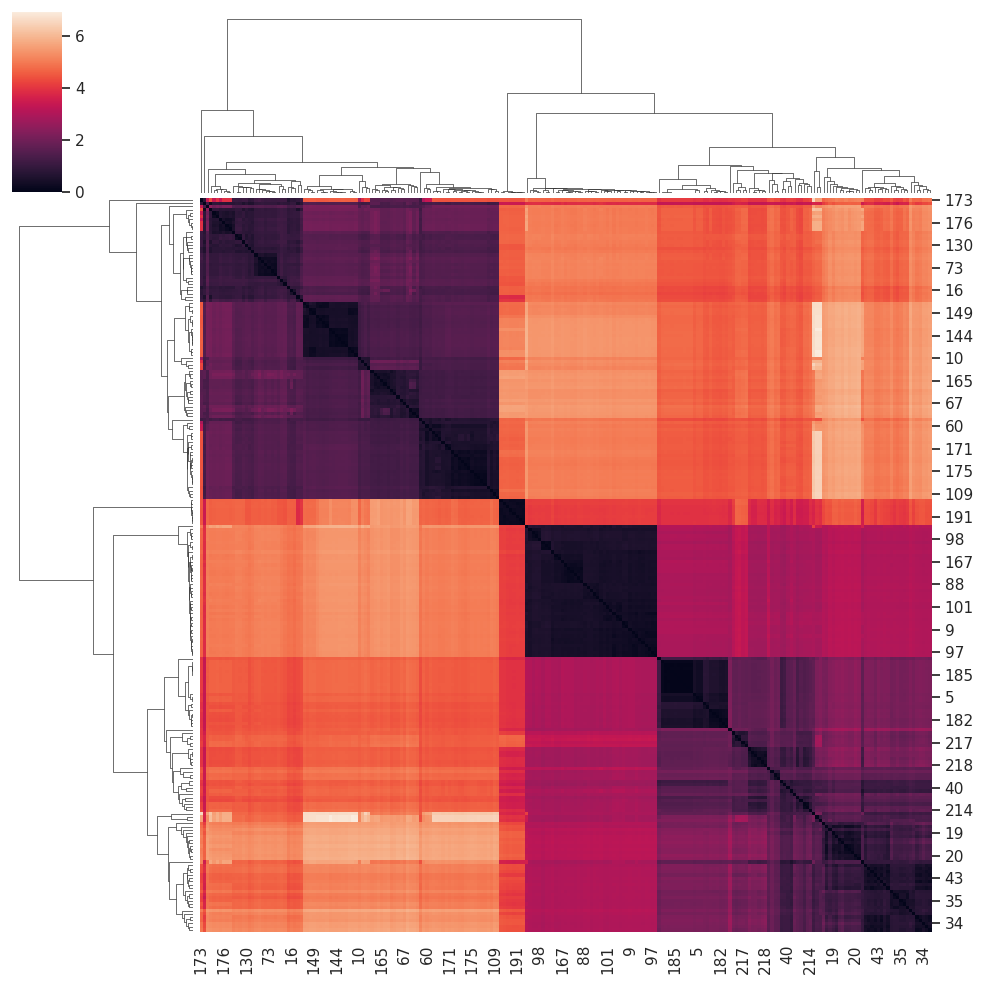

In [266]:
df = struct_dict[["id", "dist"]]
df_2 =  pd.DataFrame(df['dist'].to_list(), columns=df.index.values.tolist())
df_2["id"]=df.index.values.tolist()

#row_linkage, col_linkage = (hc.linkage(sp.distance.pdist(x), method='single')
#  for x in (df_2.values[:,:-1], df_2.values[:,:-1].T))

#row_linkage = hc.linkage((df_2.values[:,:-1], df_2.values[:,:-1].T), method='single')
 # for x in df_2.values[:,:-1])
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df_2.values[:,:-1])#, row_linkage=row_linkage, col_linkage=col_linkage, standard_scale=1)
#sns.clustermap(df_tmp)
#plt.show()
# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()

In [268]:
#df["name"] = df["id"].apply(lambda x: x.split(".")[0])
df_2.pop("id")#.reset_index(drop=True, inplace = True) 
df_2.columns = df["id"].to_list()
df_2["idx"] = df["id"].to_list()
df_2.set_index("idx", inplace=True)
df_2.to_csv("results/global_dist_data_23_08_13.csv",float_format='%.8f')

## Local structure alignment

In [51]:

# Load Global structure_alignment_df

with open("cap_structure_alignment_tanase_23_08_04.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)

# Small_cap_domain



with open("seq_dist_Needle_23_08_03.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)
  

In [52]:
kmeans_seq = KMeans(n_clusters=5, random_state=0).fit(seq_dict["vec"])

print(len(kmeans_seq.labels_))

seq_id_label_map = {_id.split("_")[0]:label for _id, label in zip(seq_dict["id"], kmeans_seq.labels_)}


230


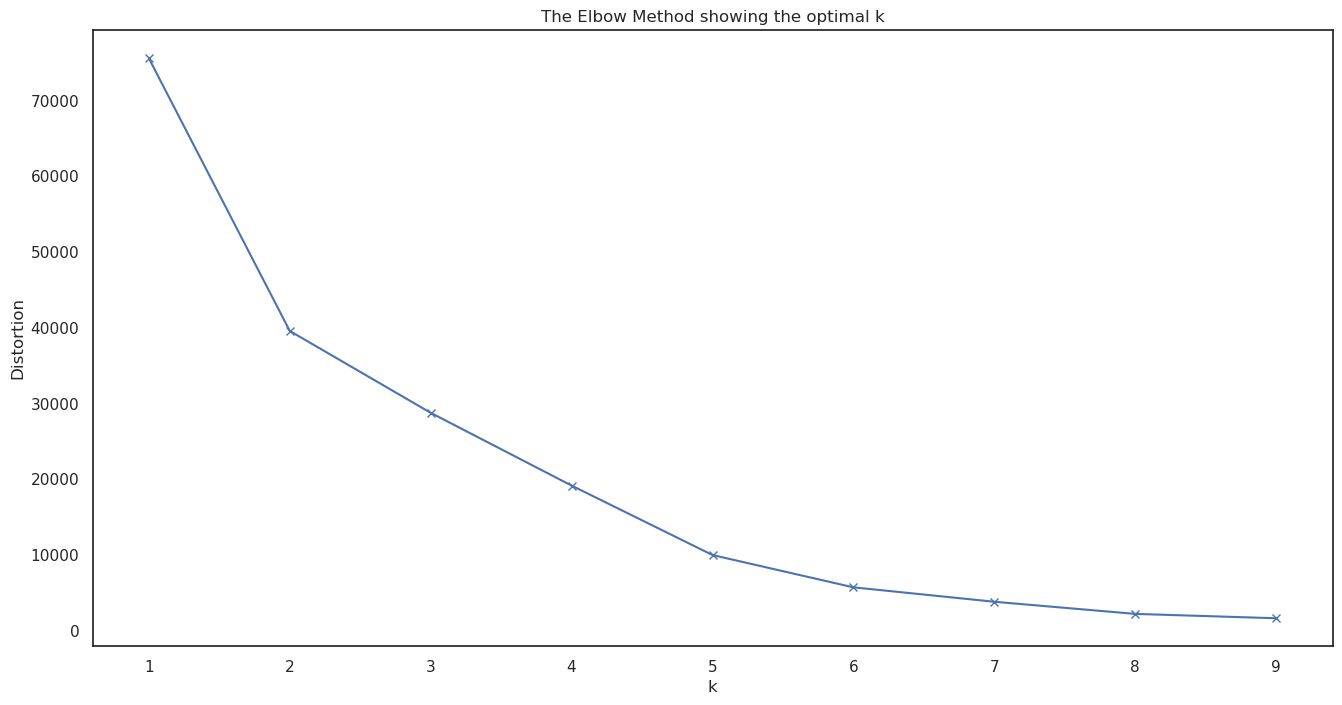

In [53]:
size = len(dict_structure_dist.keys()) #256

arr = np.zeros((size,size))
arr_1 = np.zeros((size,))
struct_dict={"id":[], "dist":[]}
for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((size,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(arr)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

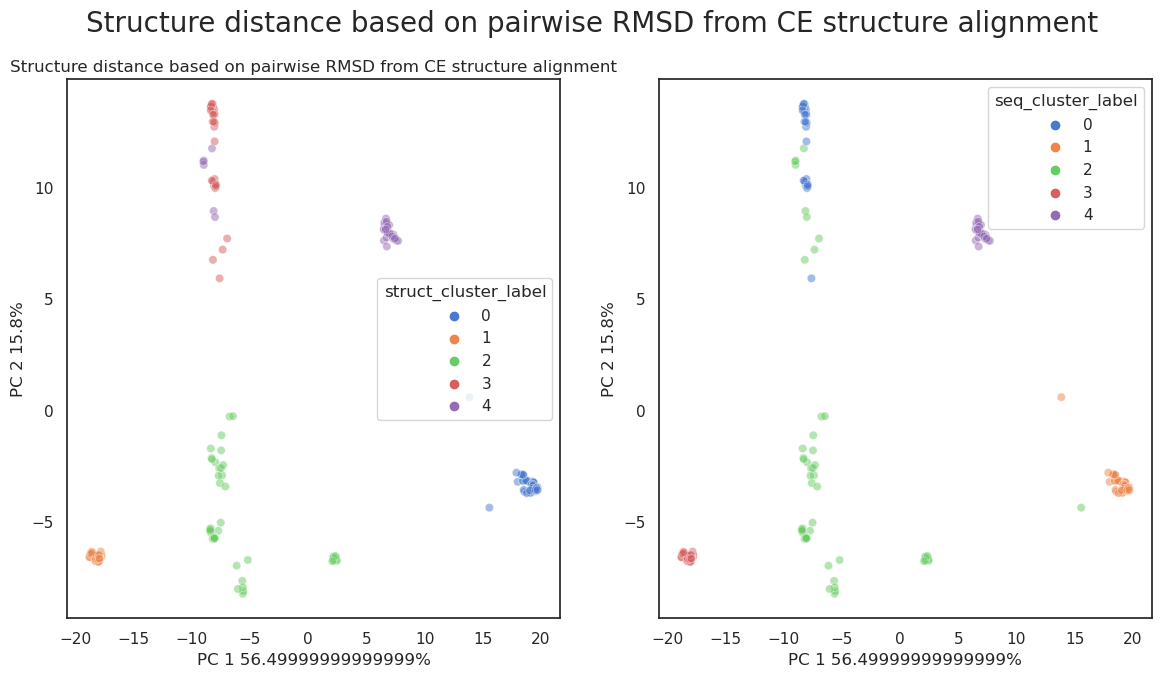

In [54]:
size = len(dict_structure_dist.keys()) #256

arr = np.zeros((size,size))
arr_1 = np.zeros((size,))
struct_dict={"id":[], "dist":[]}

n_clusters=5

for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((size,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]
    struct_dict["id"].append(rec_outer[0])
    struct_dict["dist"].append(arr_1)
kmeans = KMeans(n_clusters=n_clusters, random_state=7).fit(arr)
struct_cluster_label = kmeans.labels_ 

pca = PCA(n_components=2)
X_embedded_pca = pca.fit_transform(arr)
list_explaned_varience = [ round(i, 3) for i in  pca.fit(arr).explained_variance_ratio_]

arr_label_maped_seq_struct = []
for rec in struct_dict["id"]:
    try:
        arr_label_maped_seq_struct.append(seq_id_label_map[rec.split(".")[0].split("_")[0]])
    except:
        arr_label_maped_seq_struct.append(3)
        #print(rec)
#arr_label_maped_seq_struct = [ seq_id_label_map[_id.split("_")[0]] for _id in struct_dict["id"]]
struct_dict["seq_cluster_label"] = arr_label_maped_seq_struct
struct_dict["struct_cluster_label"] = struct_cluster_label
struct_dict = pd.DataFrame(struct_dict)

def pc_split(vec):
    pcs = pca.transform([vec])
    return pcs[0,0], pcs[0,1]

struct_dict[f"PC 1 {list_explaned_varience[0]*100}%"], struct_dict[f"PC 2 {list_explaned_varience[1]*100}%"] = zip(*struct_dict["dist"].map(pc_split))

f, ax = plt.subplots(1,2,figsize=[14,7])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax[0], hue="struct_cluster_label")
ax[0].set_title("Structure distance based on pairwise RMSD from CE structure alignment")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax[1], hue="seq_cluster_label")
#ax[1].set_title("Structure distence based on pairwise RMSD from CE structure alignment")
f.suptitle("Structure distance based on pairwise RMSD from CE structure alignment")
f.savefig("struct_dist_rmsd.png")
plt.show()

In [91]:
struct_dict[["id", "seq_cluster_label", "struct_cluster_label"]].to_csv("cap_cluster_data.csv")

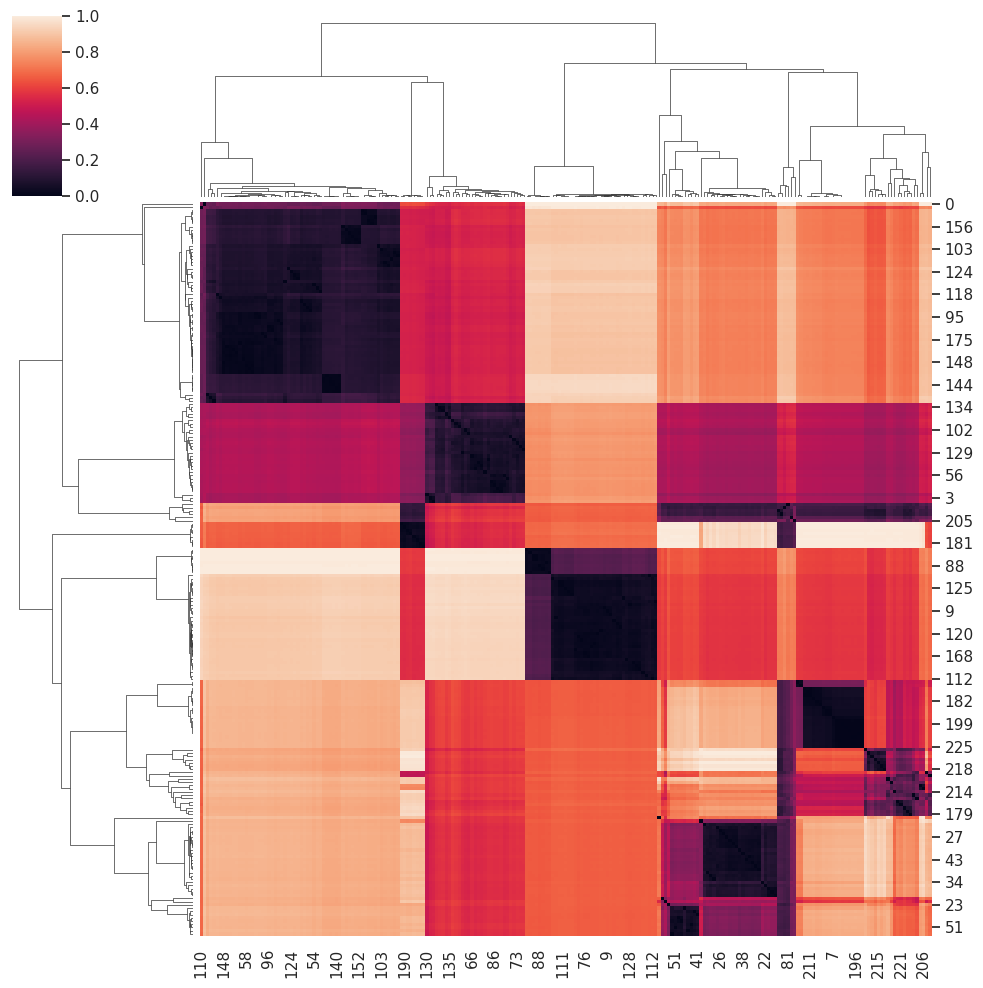

In [56]:
df = struct_dict[["id", "dist"]]
df_2 =  pd.DataFrame(df['dist'].to_list(), columns=df.index.values.tolist())
df_2["id"]=df.index.values.tolist()
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df_2.values[:,:-1], standard_scale=1)
#plt.show()
# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()

In [92]:
df["name"] = df["id"].apply(lambda x: x.split(".")[0])

df_2.pop("id")#.reset_index(drop=True, inplace = True) 
df_2.columns = df["name"].to_list()
df_2["idx"] = df["name"].to_list()
df_2.set_index("idx", inplace=True)
df_2.to_csv("cap_dist_data_.csv",float_format='%.8f')

In [27]:
df_2

2563232424    2808082563    2837623044    2734583469  \
idx                                                                  
2563232424  3.579164e-15  3.553966e+00  2.374348e-01  1.744789e-01   
2808082563  3.553966e+00  7.256388e-15  3.518862e+00  3.577645e+00   
2837623044  2.374348e-01  3.518862e+00  2.937579e-15  2.848289e-01   
2734583469  1.744789e-01  3.577645e+00  2.848289e-01  2.709255e-15   
2673085225  3.685459e+00  3.335830e+00  3.640305e+00  3.704819e+00   
...                  ...           ...           ...           ...   
2645861674  3.898976e+00  2.849880e+00  3.940417e+00  3.891822e+00   
2917284031  2.038096e+00  3.538921e+00  2.062243e+00  2.003680e+00   
2581305531  3.686565e+00  3.335017e+00  3.641514e+00  3.706073e+00   
2635528200  3.668073e+00  4.414680e+00  3.632363e+00  3.691484e+00   
2585308755  3.914810e+00  2.848505e+00  3.954944e+00  3.907525e+00   

              2673085225  2831425956  2768110288  2800827582  2642101342  \
idx                                                                        
2563232424  3.685459e+00    2.020368    3.917914    0.182173    3.681711   
2808082563  3.335830e+00    3.527710    2.888310    3.624315    3.336852   
2837623044  3.640305e+00    2.046076    3.958347    0.243927    3.636428   
2734583469  3.704819e+00    1.983054    3.910208    0.268085    3.701228   
2673085225  3.693643e-15    3.677621    2.905254    3.754762    0.033681   
...                  ...         ...         ...         ...         ...   
2645861674  2.868976e+00    3.217383    0.167724    3.948731    2.873646   
2917284031  3.683874e+00    0.148471    3.205120    2.006807    3.683670   
2581305531  2.630124e-02    3.675227    2.909517    3.756118    0.023963   
2635528200  4.165430e+00    3.469715    2.885146    3.735020    4.176331   
2585308755  2.865925e+00    3.218051    0.163080    3.963722    2.870608   

            2869309611  ...  2621025926  2564011747  2554441166  2873090557  \
idx                     ...                                                   
2563232424    3.647555  ...    2.886218    3.661230    3.692473    4.303952   
2808082563    4.952121  ...    5.408814    4.997938    5.056585    3.048448   
2837623044    3.613519  ...    2.887747    3.625129    3.654566    4.313095   
2734583469    3.669732  ...    2.873630    3.684627    3.716948    4.306682   
2673085225    4.200071  ...    4.963012    4.266525    4.200005    3.040473   
...                ...  ...         ...         ...         ...         ...   
2645861674    2.853562  ...    3.058378    2.855313    2.855417    1.051058   
2917284031    3.485540  ...    2.080528    3.464184    3.484518    3.428382   
2581305531    4.202916  ...    4.961630    4.269652    4.203195    3.044167   
2635528200    1.671791  ...    4.714233    1.601166    1.889317    3.062733   
2585308755    2.850198  ...    3.050459    2.851384    2.851233    1.063769   

            2755298023    2645861674    2917284031    2581305531  \
idx                                                                
2563232424    1.288736  3.898976e+00  2.038096e+00  3.686565e+00   
2808082563    3.125068  2.849880e+00  3.538921e+00  3.335017e+00   
2837623044    1.216850  3.940417e+00  2.062243e+00  3.641514e+00   
2734583469    1.216666  3.891822e+00  2.003680e+00  3.706073e+00   
2673085225    3.129763  2.868976e+00  3.683874e+00  2.630124e-02   
...                ...           ...           ...           ...   
2645861674    4.299983  4.037975e-15  3.171143e+00  2.873529e+00   
2917284031    1.625124  3.171143e+00  3.243977e-15  3.681469e+00   
2581305531    3.131708  2.873529e+00  3.681469e+00  3.289441e-15   
2635528200    3.167166  2.851901e+00  3.480547e+00  4.167613e+00   
2585308755    4.312331  7.860424e-02  3.171932e+00  2.870434e+00   

              2635528200    2585308755  
idx                                     
2563232424  3.668073e+00  3.914810e+00  
2808082563  4.414680e+00  2.848505e+00  
2837623044  3.632363e+00  3.954944e+0

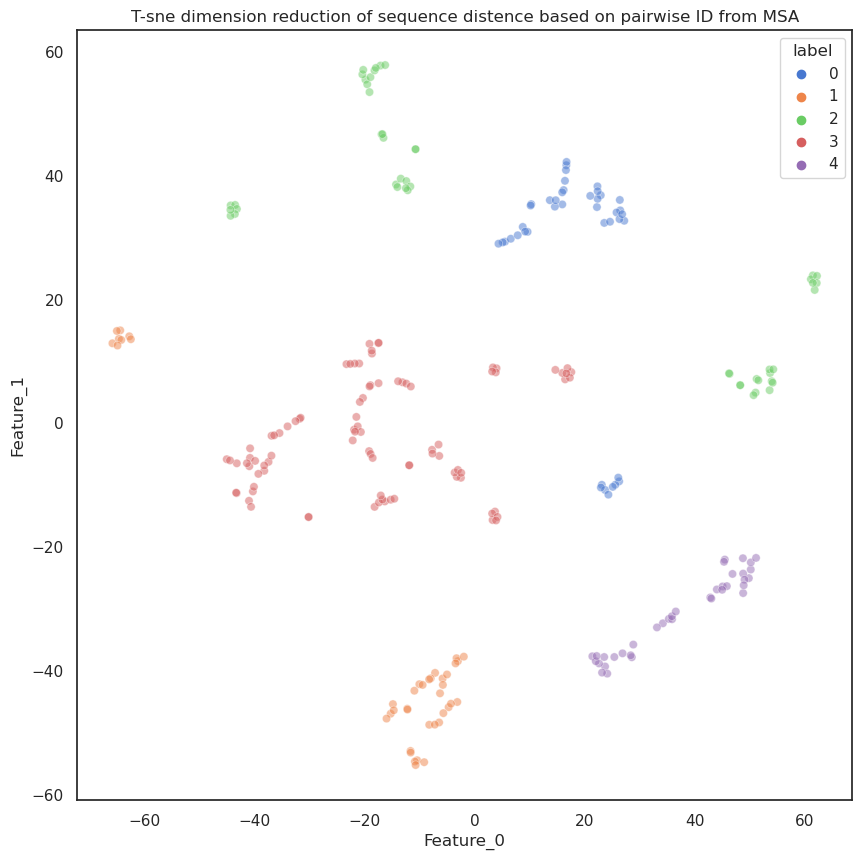

In [28]:
X_embedded_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=5).fit_transform(arr)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(arr)

# make_dict

data_t_sne = {"Feature_0":[], "Feature_1":[]}
for x in X_embedded_tsne:
    data_t_sne["Feature_0"].append(x[0])
    data_t_sne["Feature_1"].append(x[1])

data_t_sne["label"]=kmeans.labels_
f, ax = plt.subplots(figsize=[10,10])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=data_t_sne, x="Feature_0", y="Feature_1", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax, hue="label")
ax.set_title("T-sne dimension reduction of sequence distence based on pairwise ID from MSA")
plt.show()

# Alignment of Active triad

In [150]:

# Load Global structure_alignment_df

with open("structure_ali_active_site.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)

# Small_cap_domain



with open("seq_dist.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)
  

FileNotFoundError: [Errno 2] No such file or directory: 'seq_dist.pkl'

In [98]:
kmeans_seq = KMeans(n_clusters=3, random_state=0).fit(seq_dict["vec"])

print(len(kmeans_seq.labels_))

seq_id_label_map = {_id.split("_")[0]:label for _id, label in zip(seq_dict["id"], kmeans_seq.labels_)}


263


In [103]:
dict_structure_dist

{'2563232424.pdb': {'2563232424.pdb': 1.1749496091904413e-15,
  '2808082563.pdb': 0.22149470108615502,
  '2837623044.pdb': 0.43682564953803843,
  '2734583469.pdb': 0.09319110423217825,
  '2673085225.pdb': 0.22996725995096332,
  '2831425956.pdb': 0.14161401778033894,
  '2768110288.pdb': 0.5702685447738476,
  '2800827582.pdb': 0.19437953083214574,
  '2642101342.pdb': 0.2454783560885127,
  '2869309611.pdb': 0.40297282479068497,
  '2812989787.pdb': 0.230590065390436,
  '2805031640.pdb': 0.5175187086173357,
  '2505790797.pdb': 0.20413215380646169,
  '2786670570.pdb': 0.4969574499999771,
  '2790744589.pdb': 0.25066245677622584,
  '2773978781.pdb': 0.5277906078514863,
  '2846498488.pdb': 0.24036200297642668,
  '2635642811.pdb': 0.5506233190311156,
  '2733488751.pdb': 0.08460609645963237,
  '641746432.pdb': 0.3856989676741156,
  '2509549983.pdb': 0.08815931245904372,
  '2835246207.pdb': 0.25665764385969686,
  '2841219448.pdb': 0.2885522446257759,
  '2842958932.pdb': 0.2898294082905222,
  '2805

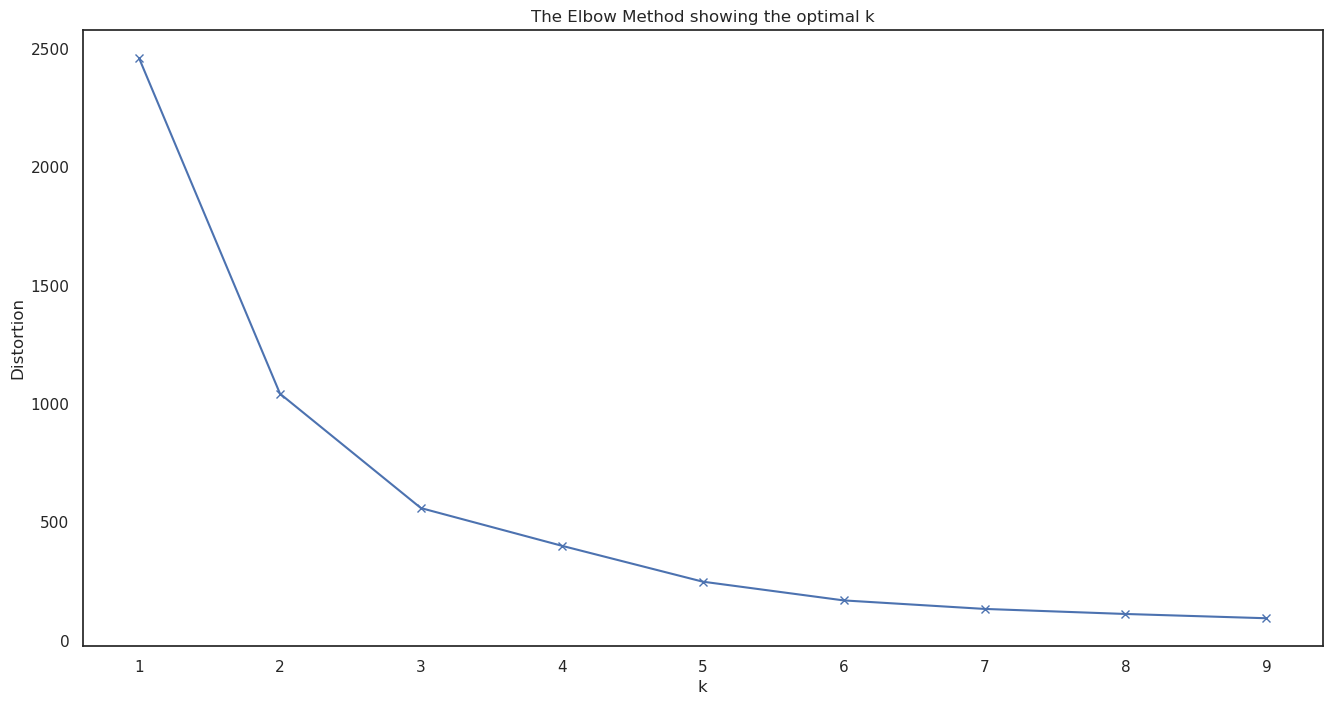

In [99]:
arr = np.zeros((256,256))
arr_1 = np.zeros((256,))
struct_dict={"id":[], "dist":[]}
for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((256,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(arr)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

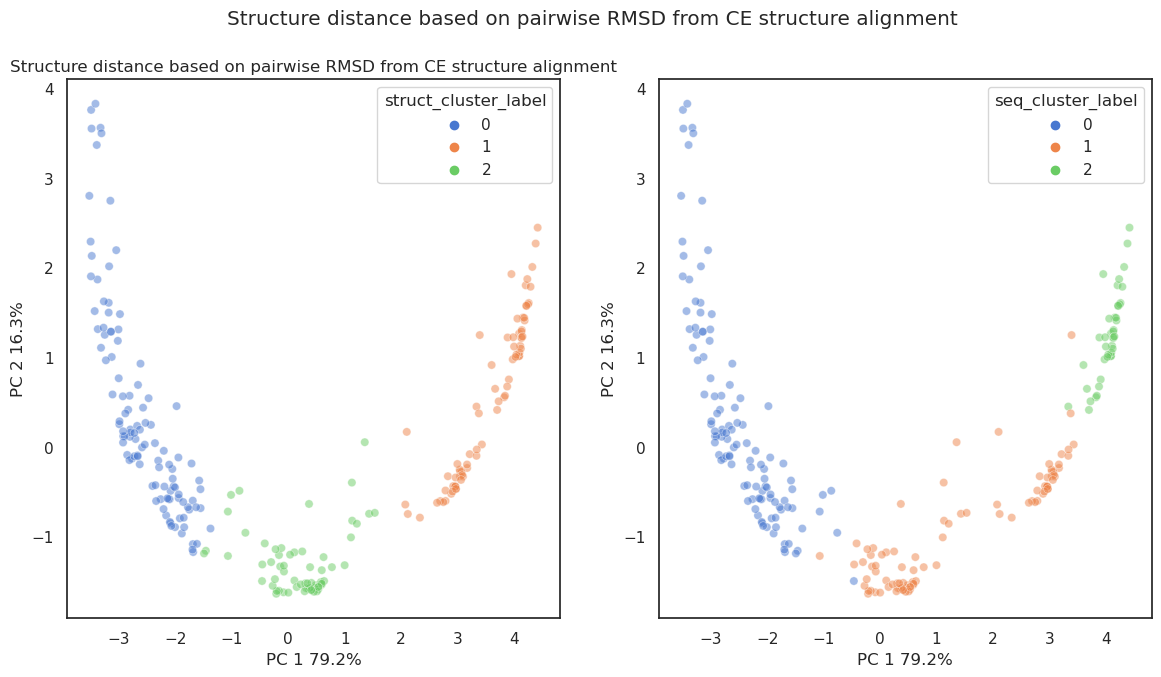

In [100]:
size = 248 #256

arr = np.zeros((size,size))
arr_1 = np.zeros((size,))
struct_dict={"id":[], "dist":[]}

n_clusters=3

for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((size,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]
    struct_dict["id"].append(rec_outer[0])
    struct_dict["dist"].append(arr_1)
kmeans = KMeans(n_clusters=n_clusters, random_state=5).fit(arr)
struct_cluster_label = kmeans.labels_ 

pca = PCA(n_components=2)
X_embedded_pca = pca.fit_transform(arr)
list_explaned_varience = [ round(i, 3) for i in  pca.fit(arr).explained_variance_ratio_]

arr_label_maped_seq_struct = []
for rec in struct_dict["id"]:
    try:
        arr_label_maped_seq_struct.append(seq_id_label_map[rec.split(".")[0].split("_")[0]])
    except:
        arr_label_maped_seq_struct.append(3)
        #print(rec)
#arr_label_maped_seq_struct = [ seq_id_label_map[_id.split("_")[0]] for _id in struct_dict["id"]]
struct_dict["seq_cluster_label"] = arr_label_maped_seq_struct
struct_dict["struct_cluster_label"] = struct_cluster_label
struct_dict = pd.DataFrame(struct_dict)

def pc_split(vec):
    pcs = pca.transform([vec])
    return pcs[0,0], pcs[0,1]

struct_dict[f"PC 1 {list_explaned_varience[0]*100}%"], struct_dict[f"PC 2 {list_explaned_varience[1]*100}%"] = zip(*struct_dict["dist"].map(pc_split))

f, ax = plt.subplots(1,2,figsize=[14,7])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax[0], hue="struct_cluster_label")
ax[0].set_title("Structure distance based on pairwise RMSD from CE structure alignment")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax[1], hue="seq_cluster_label")
#ax[1].set_title("Structure distence based on pairwise RMSD from CE structure alignment")
f.suptitle("Structure distance based on pairwise RMSD from CE structure alignment")
f.savefig("struct_dist_rmsd.png")
plt.show()

/home/sandra/anaconda3/envs/protein_metrics/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


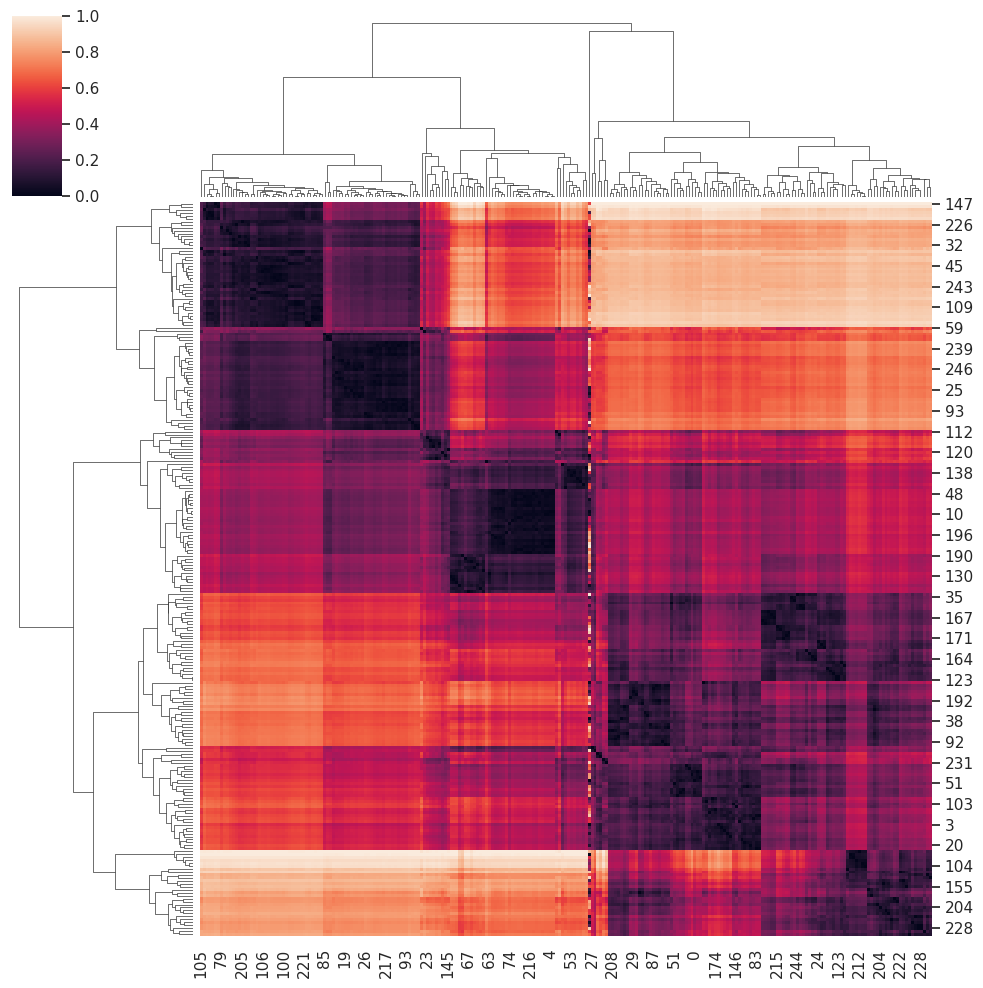

In [101]:
df = struct_dict[["id", "dist"]]
df_2 =  pd.DataFrame(df['dist'].to_list(), columns=df.index.values.tolist())
df_2["id"]=df.index.values.tolist()
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df_2, standard_scale=1)
#plt.show()
# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()

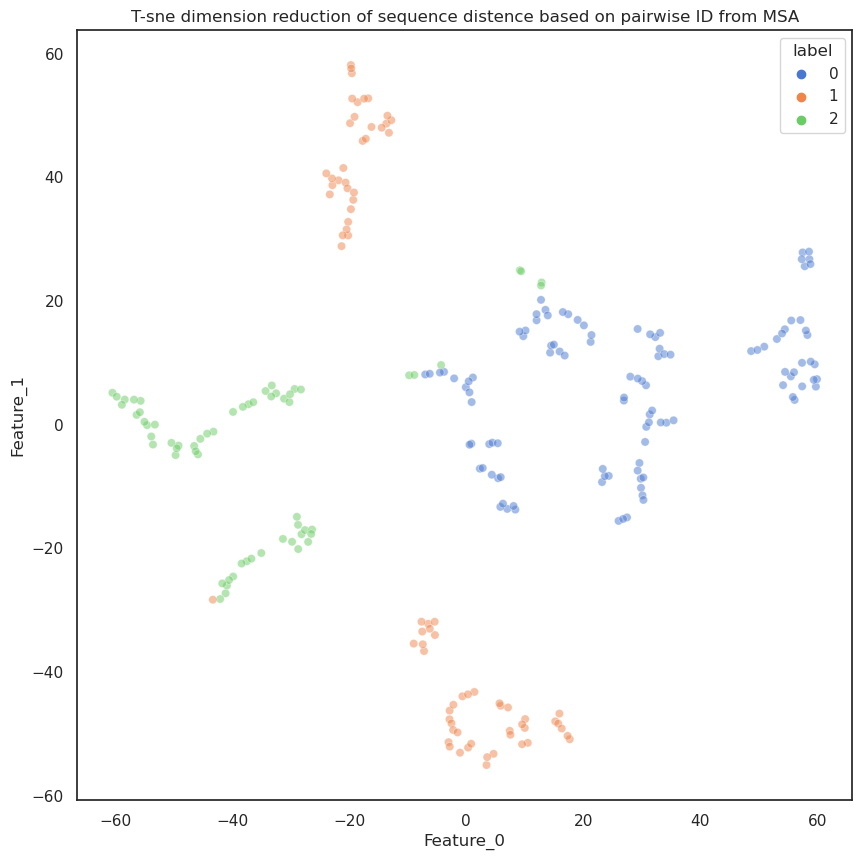

In [102]:
X_embedded_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=5).fit_transform(arr)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(arr)

# make_dict

data_t_sne = {"Feature_0":[], "Feature_1":[]}
for x in X_embedded_tsne:
    data_t_sne["Feature_0"].append(x[0])
    data_t_sne["Feature_1"].append(x[1])

data_t_sne["label"]=kmeans.labels_
f, ax = plt.subplots(figsize=[10,10])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=data_t_sne, x="Feature_0", y="Feature_1", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax, hue="label")
ax.set_title("T-sne dimension reduction of sequence distence based on pairwise ID from MSA")
plt.show()